# Support Vector Machine Problem 2

#### Task:
Prepare a classification model using SVM for salary data 

#### Data description:
- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation	 -- occupation of an individuals
- relationship -- 	relationship of an individual
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual


## Steps:

1. Import new data set
    - understand the dataset, look into it. 
    - perform EDA. show profiling.
    - check data info and null values.
2. Feature analysis
    - understand all features involeved.
    - list out features that needs to be considered in the model.
    - Remove Bias in the model - UNDERSAMPLE vs SMOTEK
    - Split dataset train and test for SVM Classification of original dataset.
    - Viasualising the clusters
3. Support Vector Nachine Models
    - Build Model
    - Make model result function
    - Experimenting with hyperparameters - CANNOT DO THIS (TOO SLOW)
    - Determine the hyperparameter C and Kernel using GridSearchCV -CANNOT PERFORM (TOO SLOW)
4. Conclusion

## Import New Dataset

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data_train = pd.read_csv("C:\\Users\\Vignesh R Babu\\excelR-datascience\\assignment_17_SVM\\17Q2\\SalaryData_Train.csv")
raw_data_test = pd.read_csv("C:\\Users\\Vignesh R Babu\\excelR-datascience\\assignment_17_SVM\\17Q2\\SalaryData_Test.csv")
raw_data_train.head() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_train = raw_data_train.copy() #Changes we make in training data should be made to testing data as well
df_test = raw_data_test.copy()

In [4]:
df_train.info() #No null values
# Many object values which needs to be converted to labels

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## Feature Analysis

All features in the dataset can be used in model building.

In [6]:
for x in range(1,len(df_train.columns)):
    print(df_train.iloc[:,x].value_counts())
    print('\n') 

#values given below reveal that there is very high bias involved in the dataset which needs to be rectified before modelling

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64


 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent   

### Label Encoding

In [7]:
df_train.columns.values


array(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'], dtype=object)

In [8]:
from sklearn import preprocessing #Label Encoding
label_encoder = preprocessing.LabelEncoder()
df_train.education= label_encoder.fit_transform(df_train.education) 
df_train.maritalstatus= label_encoder.fit_transform(df_train.maritalstatus) 
df_train.workclass= label_encoder.fit_transform(df_train.workclass) 
df_train.occupation= label_encoder.fit_transform(df_train.occupation) 
df_train.relationship= label_encoder.fit_transform(df_train.relationship) 
df_train.race= label_encoder.fit_transform(df_train.race) 
df_train.sex= label_encoder.fit_transform(df_train.sex) 
df_train.native= label_encoder.fit_transform(df_train.native) 
df_train.Salary= label_encoder.fit_transform(df_train.Salary) 
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [9]:
label_encoder = preprocessing.LabelEncoder()
df_test.education= label_encoder.fit_transform(df_test.education) 
df_test.maritalstatus= label_encoder.fit_transform(df_test.maritalstatus) 
df_test.workclass= label_encoder.fit_transform(df_test.workclass) 
df_test.occupation= label_encoder.fit_transform(df_test.occupation) 
df_test.relationship= label_encoder.fit_transform(df_test.relationship) 
df_test.race= label_encoder.fit_transform(df_test.race) 
df_test.sex= label_encoder.fit_transform(df_test.sex) 
df_test.native= label_encoder.fit_transform(df_test.native) 
df_test.Salary= label_encoder.fit_transform(df_test.Salary) 

In [10]:
df_train.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

<AxesSubplot:>

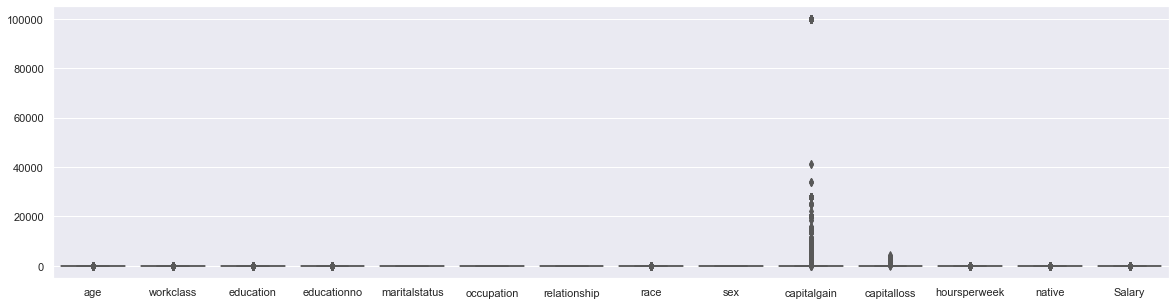

In [11]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=df_train, orient="v", palette="Set2") 
#There are outliers in the case of capital gain. But we cannot discard it

### Removing Bias in the Dataset

In [35]:
from imblearn.combine import SMOTETomek
from collections import Counter

resamp = df_train.copy()
#SMOTEK TECHNIQUE

#Define dataset
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

#Count before
print(Counter(b))

smt = SMOTETomek(sampling_strategy = 'auto')
m, n = smt.fit_resample(a, b)

#Count after
print(Counter(n)) #removed bias in dataset succefully
#SMOTEK method is very efficient but my local machine cannot process data fast enough.
#I have tried working with Google COlab but same issues there too. Processing time for modelling is very high
#Data takes too much time to process during mmodelling, therefore, we will try undersampling to speed up the modeling.

Counter({0: 22653, 1: 7508})
Counter({0: 22247, 1: 22247})


In [28]:
'''from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Count before
print(Counter(b))

und = RandomUnderSampler()
m,n = und.fit_resample(a,b)

#Count after
print(Counter(n)) #No other choice because model training is too slow'''

Counter({0: 22653, 1: 7508})
Counter({0: 7508, 1: 7508})


### Train | Split dataset
#### Original Dataset

In [36]:
X_train =m
X_test = df_test.iloc[:,:-1]
y_train = n
y_test = df_test.iloc[:,-1] 

### Visualizing the data

This took too much time to load

In [15]:
#Visualising the data via dimensionality reduction t-Sine Technique
#from sklearn.manifold import TSNE

#data_tsne_pca = TSNE(n_components=2).fit_transform(a)
#sns.scatterplot(data_tsne_pca[:,0],data_tsne_pca[:,1],hue=b, palette="deep").set_title('T-Sine Visualization of Salary dataset')

## Support Vector Machine Model
This is taking too much time to model. I am not sure where it went wrong

- https://ai.stackexchange.com/questions/7202/why-does-training-an-svm-take-so-long-how-can-i-speed-it-up#:~:text=The%20most%20likely%20explanation%20is,entries%20over%20and%20over%20again.

- https://stackoverflow.com/questions/31681373/making-svm-run-faster-in-python

### Attempting a Bagging Classifier to boost the SVM

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [44]:
n_estimators = 10
model = OneVsRestClassifier(BaggingClassifier(LinearSVC(), max_samples=1.0 / n_estimators, n_estimators=n_estimators), n_jobs=-1)

In [45]:
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=LinearSVC(),
                                                max_samples=0.1),
                    n_jobs=-1)

### Model Evaluation Function

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
def report_model(model):
    model_preds = model.predict(X_test)
    print(confusion_matrix(y_test,model_preds))
    print(classification_report(y_test,model_preds))
    plot_confusion_matrix(model,X_test,y_test)



[[10394   966]
 [ 1917  1783]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88     11360
           1       0.65      0.48      0.55      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.70      0.72     15060
weighted avg       0.80      0.81      0.80     15060



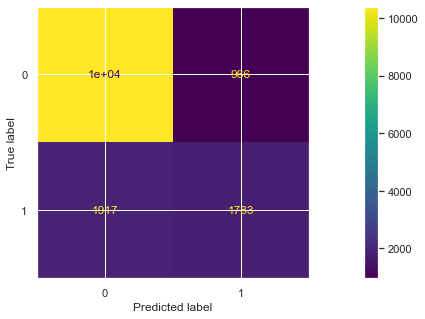

In [47]:
report_model(model) #Testing data is also biased.

## Conclusion
- EDA was perfomed on initial dataset and all errors were removed.
- Inbuilt databias of the dataset was rectified.
- UNABLE TO SPEED UP REGULAR SVM PROCESS. 
- LinearSVC is not exactly Linear SVM. There are some variations.
- This classification methodology takes too much time and computing power.
- Random Forest is a much better alternative to SVM.